# Predicting Telco Customer Churn

## Step 1: Data Cleaning

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading in Data
telco = pd.read_csv("telco_churn.csv")
display(telco.head())
display(telco.info())
display(telco.isna().sum())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values, however total charges is saved as a object instead of a float64

In [63]:
#Changing data type

#telco["TotalCharges"] = telco["TotalCharges"].astype(float)

## Results in error

Trying to change type results in an error. This will be investigated

In [127]:
telco[pd.to_numeric(telco.TotalCharges, errors='coerce').isnull()]["TotalCharges"]

# here we see NA were saved a " "

AttributeError: 'DataFrame' object has no attribute 'TotalCharges'

In [128]:
#Re reading data with 
telco = pd.read_csv("telco_churn.csv", na_values=[' '])

display(telco.isna().sum())
display(telco.dtypes)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [129]:
#Changing object to categories to reduce memory
for col in ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']:
    telco[col] = telco[col].astype('category')
    
telco.dtypes

customerID          category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

This fixed the problem
# EDA

We will look at the distribution of each variable and how it connects to whether or not a customer churns.

##  Churn

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

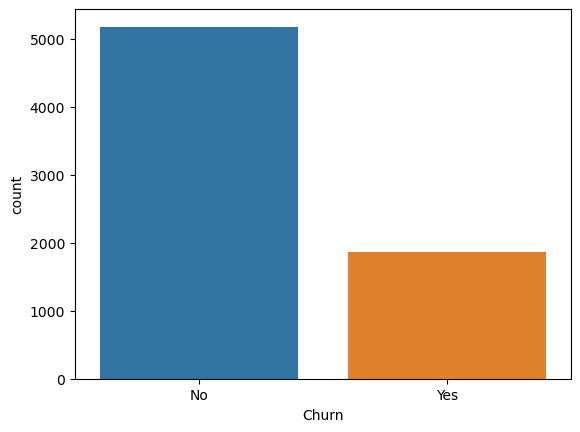

In [130]:
# Distribution of Gender
display(telco["Churn"].value_counts(normalize = True)*100)

sns.countplot(x="Churn", data = telco)

Roughly 27 % of the customers churn while 73% renew their subscription.

## Gender

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

<Axes: xlabel='gender', ylabel='count'>

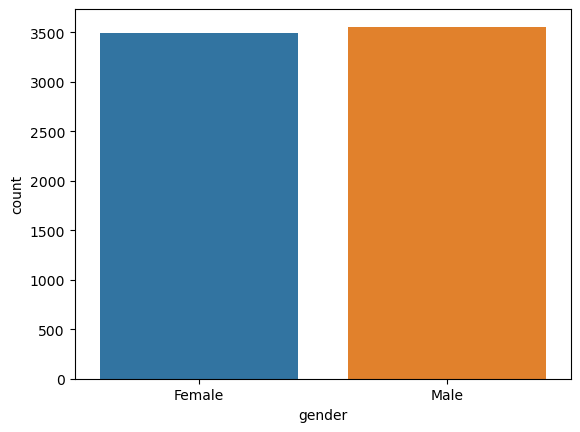

In [131]:
# Distribution of Gender
display(telco["gender"].value_counts(normalize = True)* 100)

sns.countplot(x="gender", data = telco)

Gender seems to be evenly distributed with each gender comprising roughly 50% of the sample.

In [132]:
# DEfining category proportion functions
def cat_prop_df(var1, var2 = "Churn", df = telco):

        df1 = pd.DataFrame(df.groupby([var2, var1]).size()).reset_index()

        df2 = pd.DataFrame(df.groupby(var1).size()).reset_index()


        df1.columns = [var2, var1 ,"Count"]
        df2.columns = [var1,"Total"]

        df3= df1.merge(df2, on = var1)

        df3["Proportion"]=  np.round(df3["Count"] / df3["Total"] * 100, 2)
        return df3
    
def cat_prop_graph(var1, var2="Churn" , df = telco, rot=0):

        df1 = pd.DataFrame(df.groupby([var2, var1]).size()).reset_index()

        df2 = pd.DataFrame(df.groupby(var1).size()).reset_index()


        df1.columns = [var2, var1 ,"Count"]
        df2.columns = [var1,"Total"]

        df3= df1.merge(df2, on = var1)

        df3["Proportion"]=  np.round(df3["Count"] / df3["Total"] * 100, 2)
        g = sns.catplot(x = var1, y = "Proportion", data = df3, kind = "bar", hue = var2)
        
        g.fig.suptitle("Relationship Between " + var2 +" and " + var1 , y = 1.05)
        
        plt.xticks(rotation = rot)
        
        plt.axhline(y=27,linewidth=1, color='orange')
        
        plt.axhline(y=73,linewidth=1, color='blue')
        plt.show()

,Churn,gender,Count,Total,Proportion
0,No,Female,2549,3488,73.08
1,Yes,Female,939,3488,26.92
2,No,Male,2625,3555,73.84
3,Yes,Male,930,3555,26.16


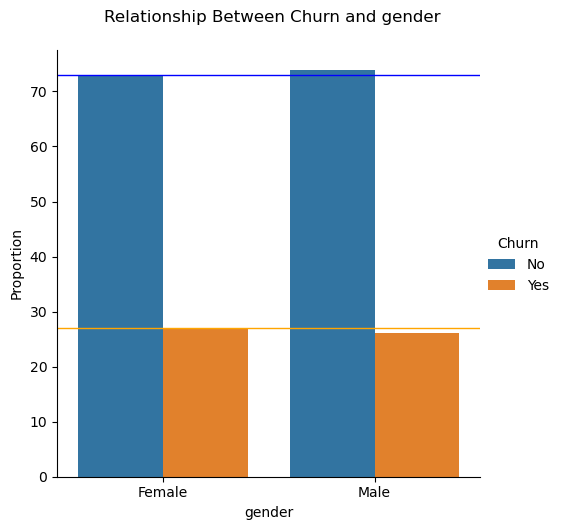

In [133]:
# Getting Proportion of churn by gender
display(cat_prop_df("gender"))

cat_prop_graph("gender")

A person gender does not seem to impact whether or not a person will churn. Each have around a 27% churn rate which is the same as whole data

## Senior Citizen

0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64

<Axes: xlabel='SeniorCitizen', ylabel='count'>

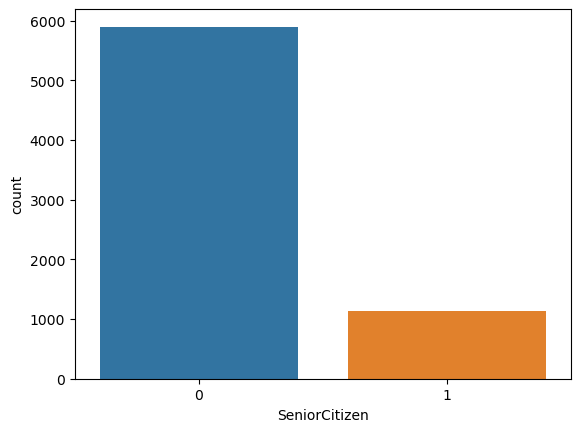

In [134]:
# Distribution of Senior Citizen
display(telco["SeniorCitizen"].value_counts(normalize = True) * 100)

sns.countplot(x="SeniorCitizen", data = telco)

Only about 15% of the customers are classified as a senior citizen (1)

In [126]:
# Relationship between Senior Citizens and Churning
display(cat_prop_df("SeniorCitizen"))

cat_prop_graph("SeniorCitizen")


KeyError: 'SeniorCitizen'

Senior Citizizens are more likely to churn compared to the average for the entire data set, however they comprise only 15% of our data.

## Partner

No     51.69672
Yes    48.30328
Name: Partner, dtype: float64

<Axes: xlabel='Partner', ylabel='count'>

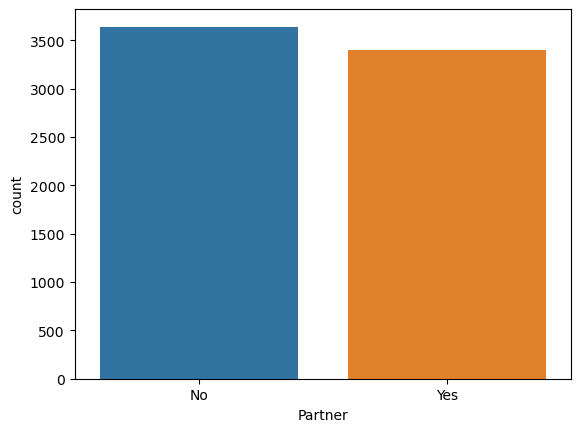

In [13]:
# Distribution of Partner
display(telco["Partner"].value_counts(normalize = True)* 100)

sns.countplot(x="Partner", data = telco)


Whether a customer has a partner appears to be evenly distributed with each comprising roughly 50% of the sample.

,Churn,Partner,Count,Total,Proportion
0,No,No,2441,3641,67.04
1,Yes,No,1200,3641,32.96
2,No,Yes,2733,3402,80.34
3,Yes,Yes,669,3402,19.66


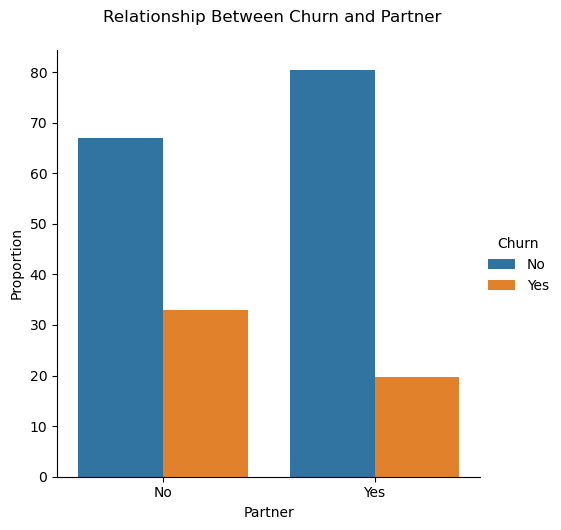

In [14]:
# Relationship to Churning
display(cat_prop_df("Partner"))

cat_prop_graph("Partner")

Partner status seems to have a slight impact on churning with proportion of churning being about 7% more for single people and 7 % less for people with partners.

## Dependents

No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64

<Axes: xlabel='Dependents', ylabel='count'>

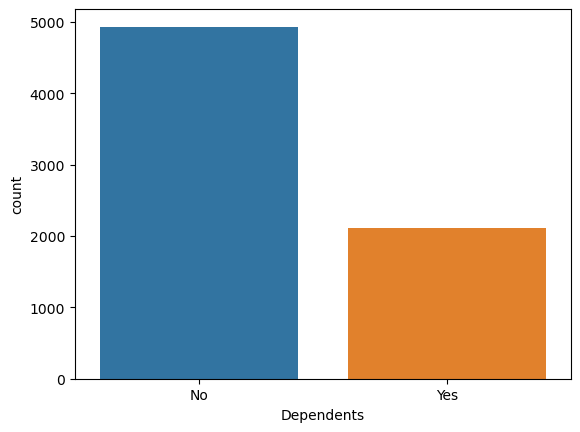

In [15]:
#Distribution of Dependents
display(telco["Dependents"].value_counts(normalize = True)*100)
sns.countplot(x="Dependents", data = telco)

This data shows 70% of customers have no dependents vs 30% who do.

,Churn,Partner,Count,Total,Proportion
0,No,No,2441,3641,67.04
1,Yes,No,1200,3641,32.96
2,No,Yes,2733,3402,80.34
3,Yes,Yes,669,3402,19.66


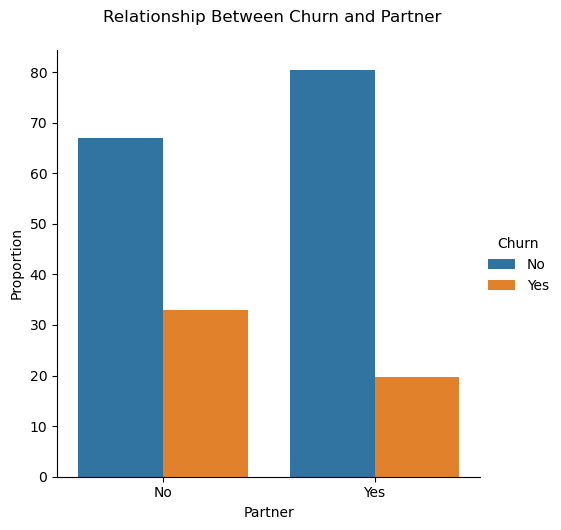

In [16]:
# Relationship to Churning
display(cat_prop_df("Partner"))

cat_prop_graph("Partner")

Depenents seems to have a slight impact on churning with proportion of churning being about 7% more for people with dependents and 7% less for people without dependents.

## PhoneService

Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64

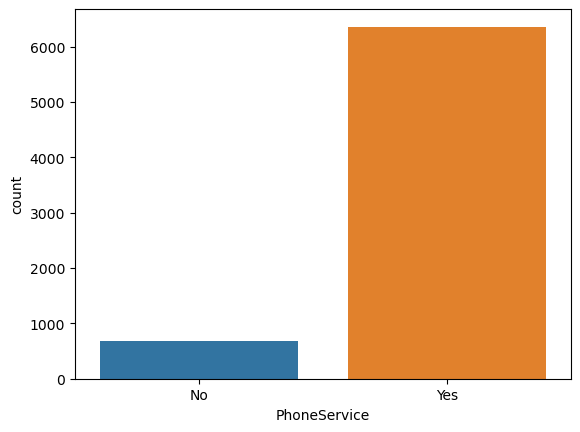

In [17]:
#defining new function
def cat_dist(var):
    display(telco[var].value_counts(normalize = True)*100)

    sns.countplot(x=var, data = telco)

cat_dist("PhoneService")

Most people have subcribed to Telco Phone Service

,Churn,PhoneService,Count,Total,Proportion
0,No,No,512,682,75.07
1,Yes,No,170,682,24.93
2,No,Yes,4662,6361,73.29
3,Yes,Yes,1699,6361,26.71


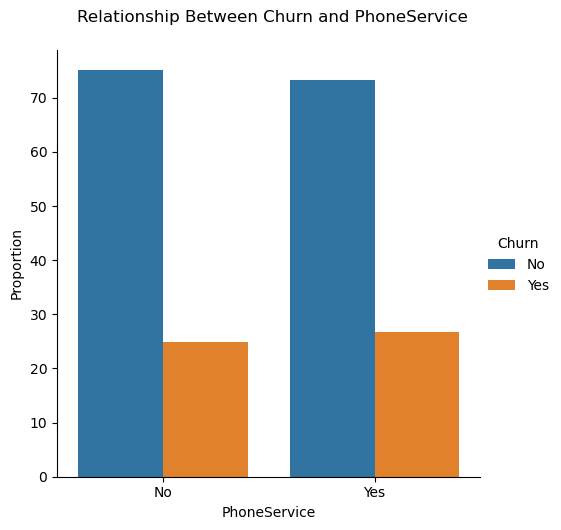

In [18]:
def cat_churn_prop(var):
    display(cat_prop_df(var))

    cat_prop_graph(var)

cat_churn_prop("PhoneService")

There does not appear to be a signifigant relationship between phone service and churning
## Multiple Lines

No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: MultipleLines, dtype: float64

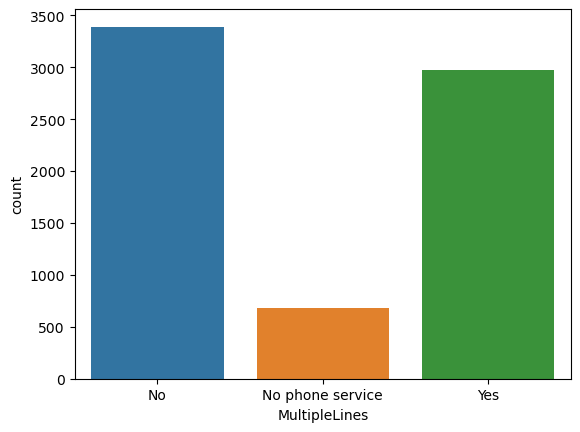

In [19]:
cat_dist("MultipleLines")

Slightly more people have onyl 1 line

,Churn,MultipleLines,Count,Total,Proportion
0,No,No,2541,3390,74.96
1,Yes,No,849,3390,25.04
2,No,No phone service,512,682,75.07
3,Yes,No phone service,170,682,24.93
4,No,Yes,2121,2971,71.39
5,Yes,Yes,850,2971,28.61


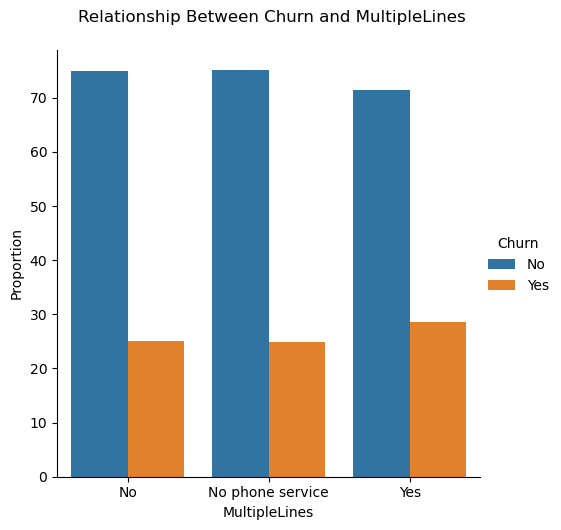

In [20]:
cat_churn_prop("MultipleLines")

There does not appear to be a strong relationship between  churning and how many lines a customer has

## Internet Service

Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64

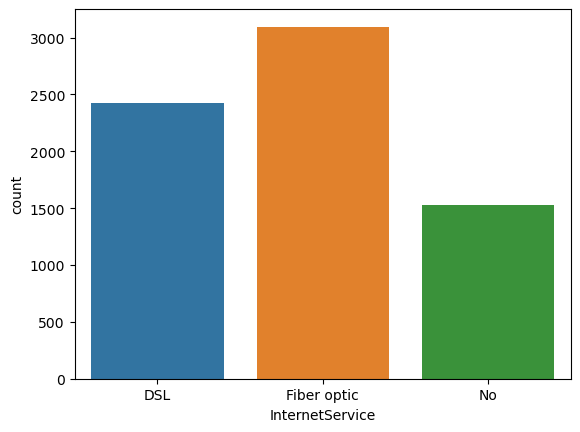

In [21]:
#Distribution of Internet Service
cat_dist("InternetService")

Most people have internet service wiht 44% having fiber optic and 34% having DSl

,Churn,InternetService,Count,Total,Proportion
0,No,DSL,1962,2421,81.04
1,Yes,DSL,459,2421,18.96
2,No,Fiber optic,1799,3096,58.11
3,Yes,Fiber optic,1297,3096,41.89
4,No,No,1413,1526,92.60
5,Yes,No,113,1526,7.40


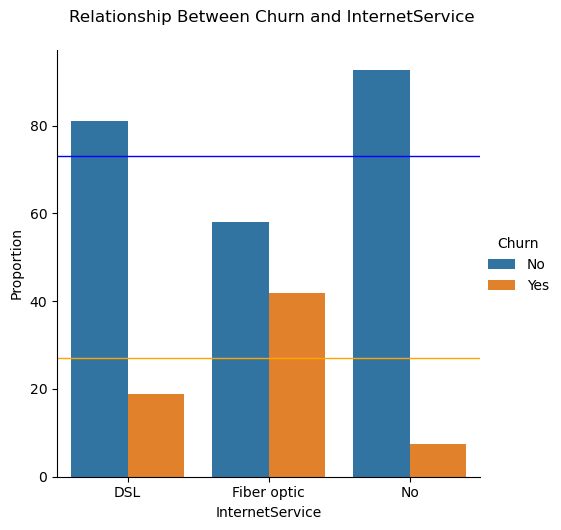

In [135]:
#Relationship to Churning
cat_churn_prop("InternetService")

People with fiberoptic service are more likely to churn and DSl subscribers are less likely to churn. This must mean that customers are not very satisfied in the fiber optic service. Suprisingling 92% of people with out internet service do not churn. I would like to explore this further by seeing churn rate based off of if they hace only phone service, only internet service, or both.

In [23]:
def func(phone, internet):
    if phone == "Yes" and internet != "No" :
        service = 'Both'
    elif  phone == "Yes" and internet == "No":
        service = 'Phone Only'
    elif phone == "No" and internet != "No":
        service = "Internet Only"
    elif phone == "No" and internet == "No":
        service = "Neither"
    return service

telco["service"]= telco.apply(lambda x: func(x['PhoneService'], x['InternetService']), axis=1)


Both             68.649723
Phone Only       21.666903
Internet Only     9.683374
Name: service, dtype: float64

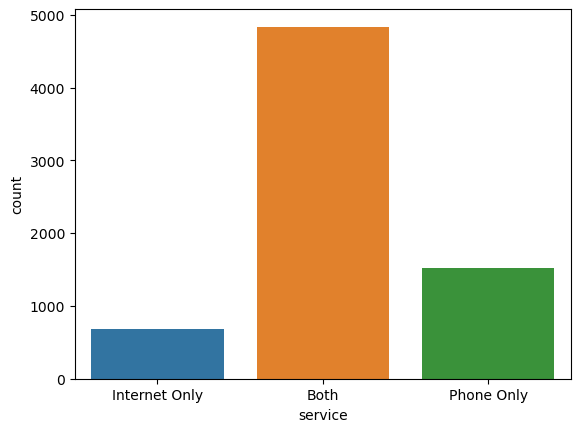

In [24]:
cat_dist("service")

,Churn,service,Count,Total,Proportion
0,No,Both,3249,4835,67.20
1,Yes,Both,1586,4835,32.80
2,No,Internet Only,512,682,75.07
3,Yes,Internet Only,170,682,24.93
4,No,Phone Only,1413,1526,92.60
5,Yes,Phone Only,113,1526,7.40


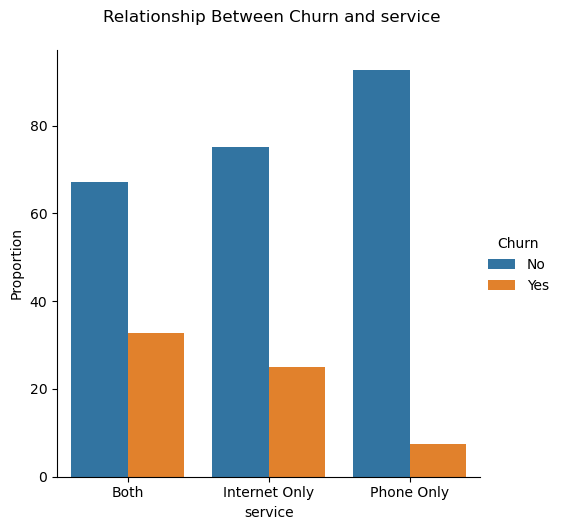

In [25]:
cat_churn_prop("service")

This data shows similiar results as the two individual cases, but does not have information about DSL and Fiber Optics. Since it contains less information, it may not be as good as the individual features

## Online Security

No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: OnlineSecurity, dtype: float64

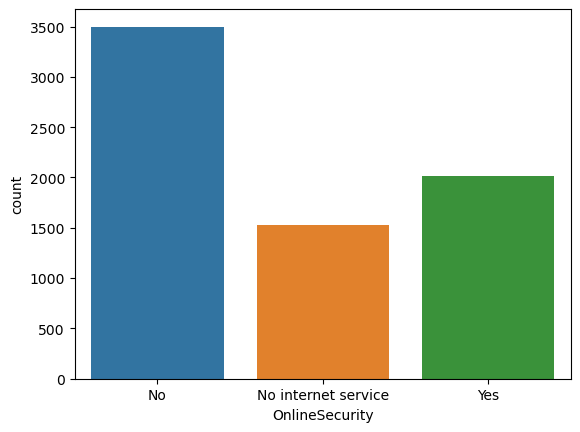

In [26]:
# Distribution of Online Security
cat_dist("OnlineSecurity")

,Churn,OnlineSecurity,Count,Total,Proportion
0,No,No,2037,3498,58.23
1,Yes,No,1461,3498,41.77
2,No,No internet service,1413,1526,92.60
3,Yes,No internet service,113,1526,7.40
4,No,Yes,1724,2019,85.39
5,Yes,Yes,295,2019,14.61


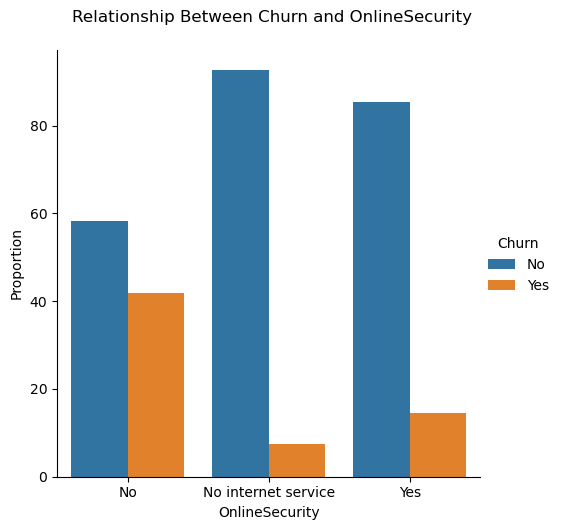

In [27]:
cat_churn_prop("OnlineSecurity")

People that have internet security are less likely to churn while those who do not are more likely.

## Online Backup

No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name: OnlineBackup, dtype: float64

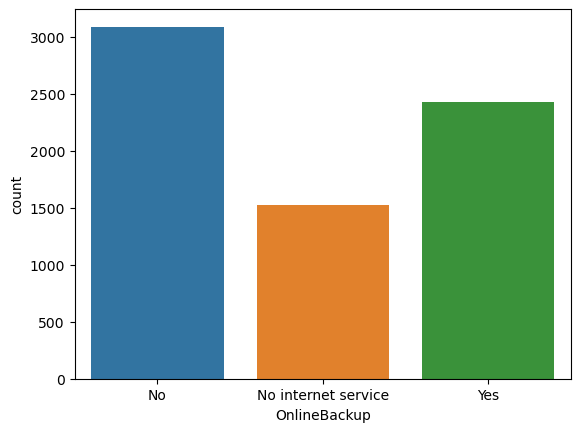

In [28]:
#Distribution of Python
cat_dist("OnlineBackup")

Most people do not back up online

,Churn,OnlineBackup,Count,Total,Proportion
0,No,No,1855,3088,60.07
1,Yes,No,1233,3088,39.93
2,No,No internet service,1413,1526,92.60
3,Yes,No internet service,113,1526,7.40
4,No,Yes,1906,2429,78.47
5,Yes,Yes,523,2429,21.53


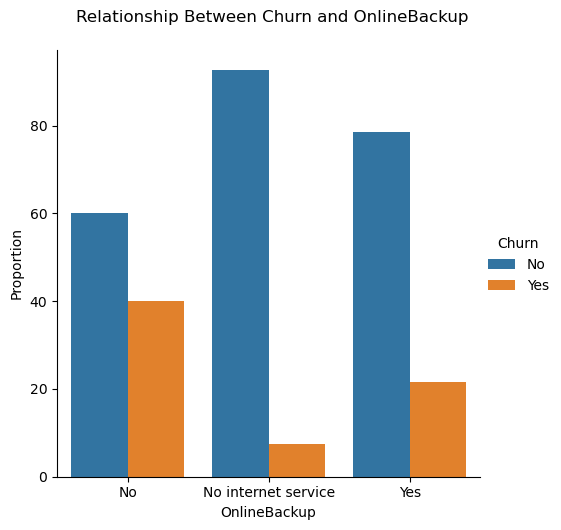

In [29]:
#Relationship to Churning
cat_churn_prop("OnlineBackup")

People without online backup are more likely to churn than those who do not. But are these the same people.

In [30]:
cat_prop_df(var2 = "OnlineBackup", var1 = "OnlineSecurity")

,OnlineBackup,OnlineSecurity,Count,Total,Proportion
0,No,No,2195,3498,62.75
1,No internet service,No,0,3498,0.00
2,Yes,No,1303,3498,37.25
3,No,No internet service,0,1526,0.00
4,No internet service,No internet service,1526,1526,100.00
5,Yes,No internet service,0,1526,0.00
6,No,Yes,893,2019,44.23
7,No internet service,Yes,0,2019,0.00
8,Yes,Yes,1126,2019,55.77


I would of assumed these two variables measured the same thing meaning the customers who did get online security also did not get online backup. This is not the case. However people with no intertenet service are represented in this variable as well. It will need to be removed before building a model


## Device Protection

No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: DeviceProtection, dtype: float64

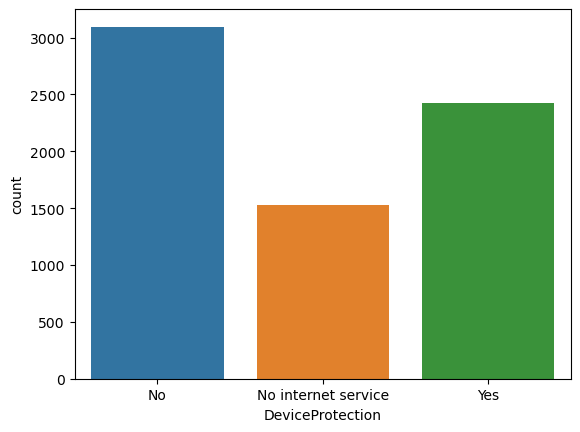

In [31]:
cat_dist("DeviceProtection")

,Churn,DeviceProtection,Count,Total,Proportion
0,No,No,1884,3095,60.87
1,Yes,No,1211,3095,39.13
2,No,No internet service,1413,1526,92.60
3,Yes,No internet service,113,1526,7.40
4,No,Yes,1877,2422,77.50
5,Yes,Yes,545,2422,22.50


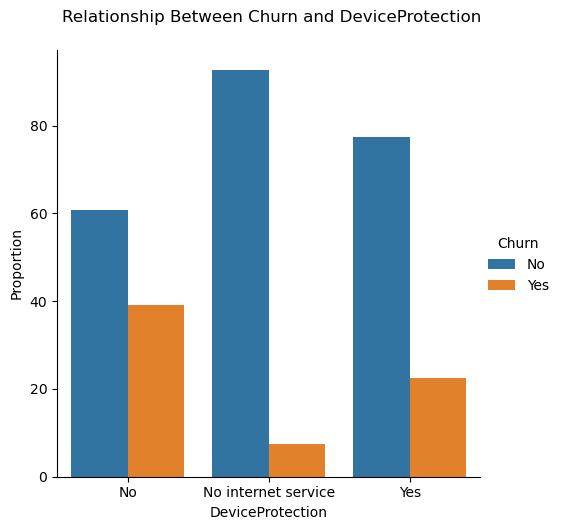

In [32]:
cat_churn_prop("DeviceProtection")

People without Device Security are more likely to churn than those who do not. But are these the same people?

In [33]:
cat_prop_df(var2 = "OnlineBackup", var1 = "DeviceProtection")

,OnlineBackup,DeviceProtection,Count,Total,Proportion
0,No,No,1984,3095,64.10
1,No internet service,No,0,3095,0.00
2,Yes,No,1111,3095,35.90
3,No,No internet service,0,1526,0.00
4,No internet service,No internet service,1526,1526,100.00
5,Yes,No internet service,0,1526,0.00
6,No,Yes,1104,2422,45.58
7,No internet service,Yes,0,2422,0.00
8,Yes,Yes,1318,2422,54.42


In [34]:
cat_prop_df(var2 = "DeviceProtection", var1 = "OnlineSecurity")

,DeviceProtection,OnlineSecurity,Count,Total,Proportion
0,No,No,2187,3498,62.52
1,No internet service,No,0,3498,0.00
2,Yes,No,1311,3498,37.48
3,No,No internet service,0,1526,0.00
4,No internet service,No internet service,1526,1526,100.00
5,Yes,No internet service,0,1526,0.00
6,No,Yes,908,2019,44.97
7,No internet service,Yes,0,2019,0.00
8,Yes,Yes,1111,2019,55.03


There is some overlap, but not enough for me to conisider it co linear. I will remove the no internet service category before building a model.

## Tech Support

No                     49.311373
Yes                    29.021724
No internet service    21.666903
Name: TechSupport, dtype: float64

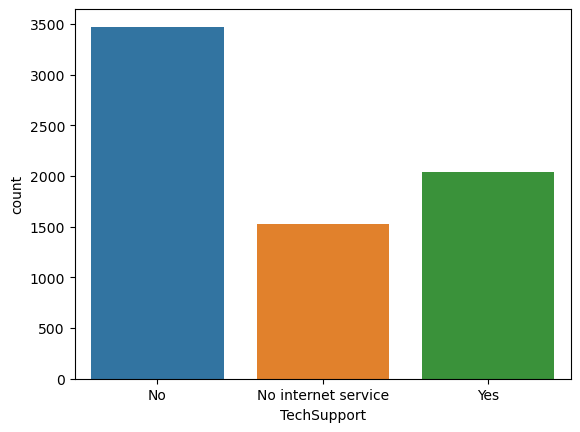

In [35]:
cat_dist("TechSupport")

,Churn,TechSupport,Count,Total,Proportion
0,No,No,2027,3473,58.36
1,Yes,No,1446,3473,41.64
2,No,No internet service,1413,1526,92.60
3,Yes,No internet service,113,1526,7.40
4,No,Yes,1734,2044,84.83
5,Yes,Yes,310,2044,15.17


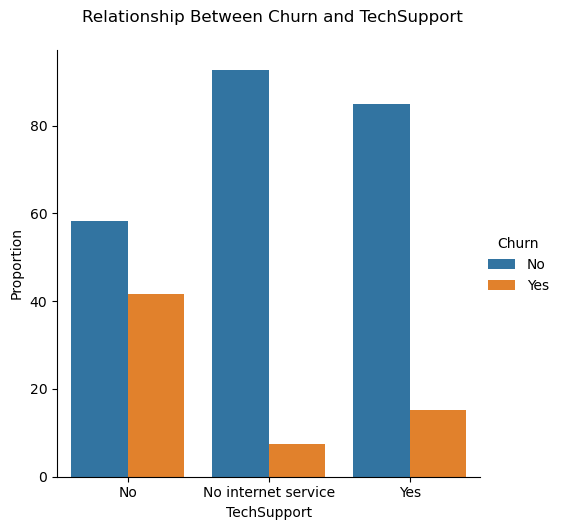

In [36]:
cat_churn_prop("TechSupport")

Again people with out tech support are more likely to churn

## Streaming Movies

No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: StreamingMovies, dtype: float64

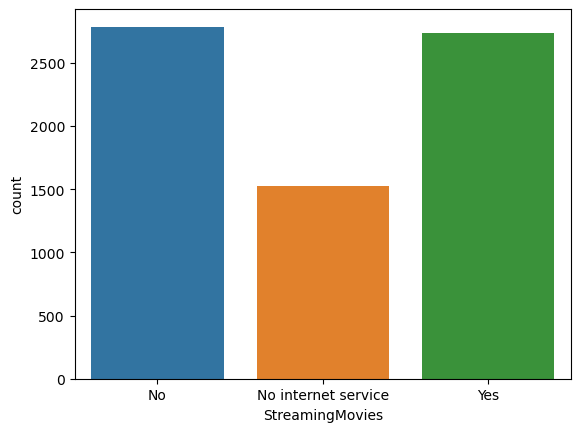

In [37]:
cat_dist('StreamingMovies')

,Churn,StreamingMovies,Count,Total,Proportion
0,No,No,1847,2785,66.32
1,Yes,No,938,2785,33.68
2,No,No internet service,1413,1526,92.60
3,Yes,No internet service,113,1526,7.40
4,No,Yes,1914,2732,70.06
5,Yes,Yes,818,2732,29.94


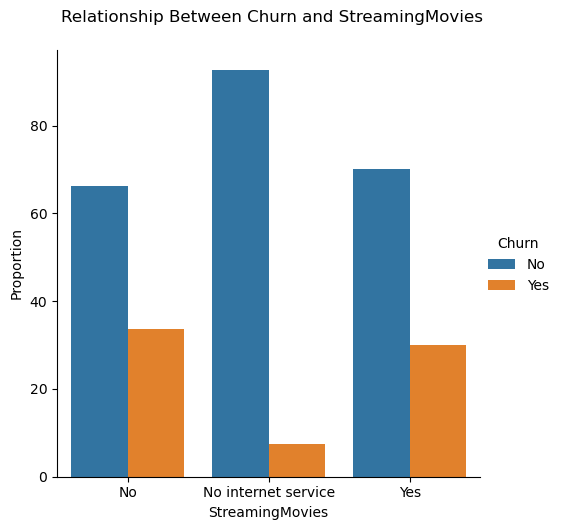

In [38]:
cat_churn_prop('StreamingMovies')

There is not a signifigant relationship between churning and steaming 

## Contract

Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: Contract, dtype: float64

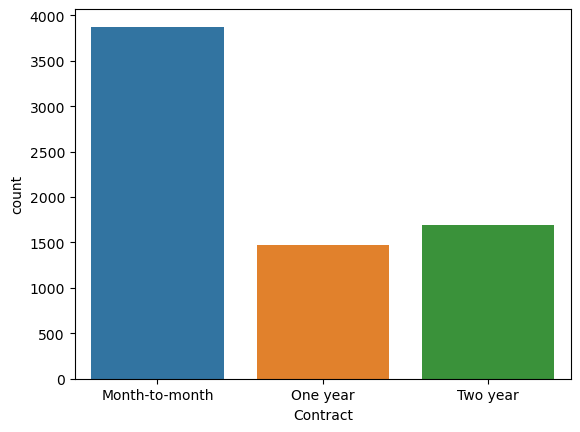

In [39]:
cat_dist("Contract")

,Churn,Contract,Count,Total,Proportion
0,No,Month-to-month,2220,3875,57.29
1,Yes,Month-to-month,1655,3875,42.71
2,No,One year,1307,1473,88.73
3,Yes,One year,166,1473,11.27
4,No,Two year,1647,1695,97.17
5,Yes,Two year,48,1695,2.83


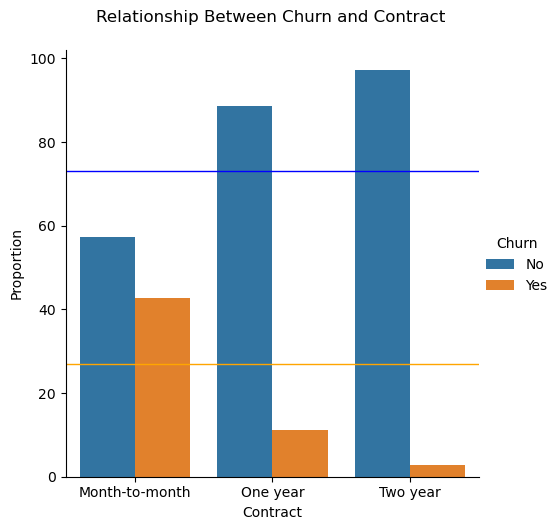

In [136]:
cat_churn_prop('Contract')
               

People who are month to month are very likely to churn and people with one or two year are less likely to churn

## Paperless Billing

Yes    59.221922
No     40.778078
Name: PaperlessBilling, dtype: float64

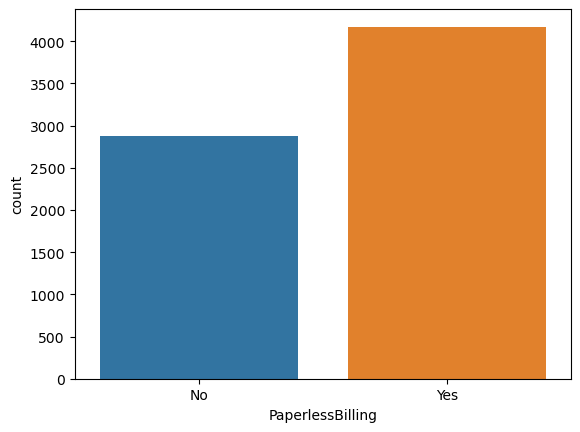

In [41]:
cat_dist("PaperlessBilling")

,Churn,PaperlessBilling,Count,Total,Proportion
0,No,No,2403,2872,83.67
1,Yes,No,469,2872,16.33
2,No,Yes,2771,4171,66.43
3,Yes,Yes,1400,4171,33.57


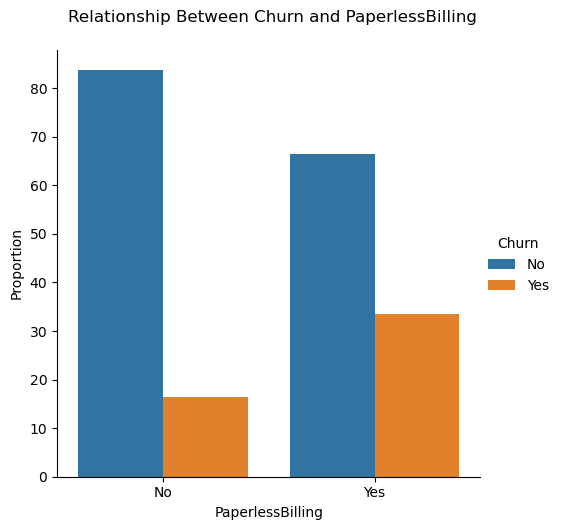

In [42]:
cat_churn_prop("PaperlessBilling")

There is a slight relationship between paperless billing and churn rate

## PaymentMethod


Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: PaymentMethod, dtype: float64

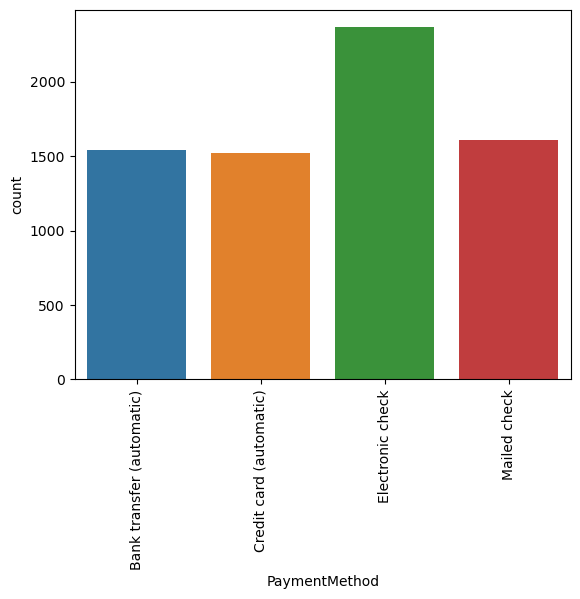

In [43]:
cat_dist("PaymentMethod")

plt.xticks(rotation = 90)

plt.show()

,Churn,PaymentMethod,Count,Total,Proportion
0,No,Bank transfer (automatic),1286,1544,83.29
1,Yes,Bank transfer (automatic),258,1544,16.71
2,No,Credit card (automatic),1290,1522,84.76
3,Yes,Credit card (automatic),232,1522,15.24
4,No,Electronic check,1294,2365,54.71
5,Yes,Electronic check,1071,2365,45.29
6,No,Mailed check,1304,1612,80.89
7,Yes,Mailed check,308,1612,19.11


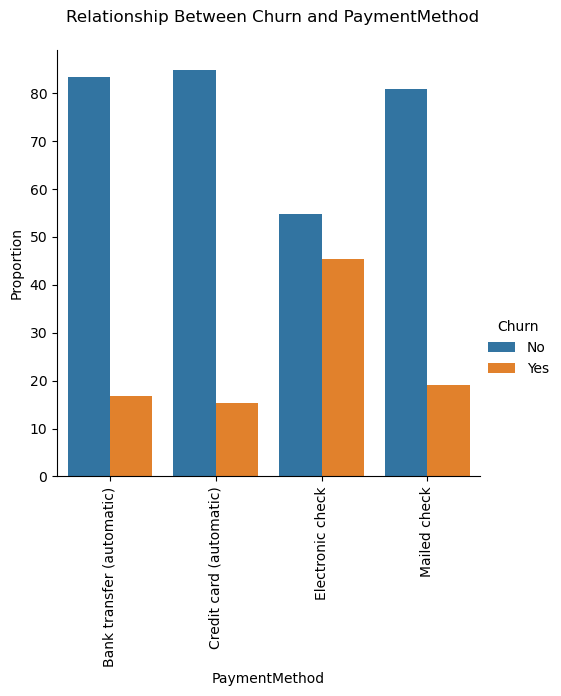

In [44]:
display(cat_prop_df("PaymentMethod"))

cat_prop_graph("PaymentMethod", rot = 90)


There is a slight relationship between payment method and churn rate for Mailed Check, Bank Transfered and Credit card and a high relationship for Electronic Check

## Monthly Charges

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

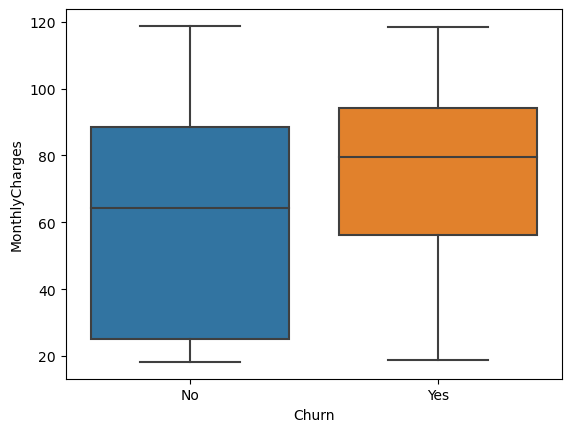

In [45]:
sns.boxplot(x="Churn", y="MonthlyCharges", data = telco)

In [46]:
telco.groupby("Churn")["MonthlyCharges"].agg({np.mean, np.median})

,median,mean
Churn,,
No,64.425,61.265124
Yes,79.650,74.441332


People who churn tend to have a higher monthly charge on average.

## TotalCharges

<Axes: xlabel='TotalCharges', ylabel='Count'>

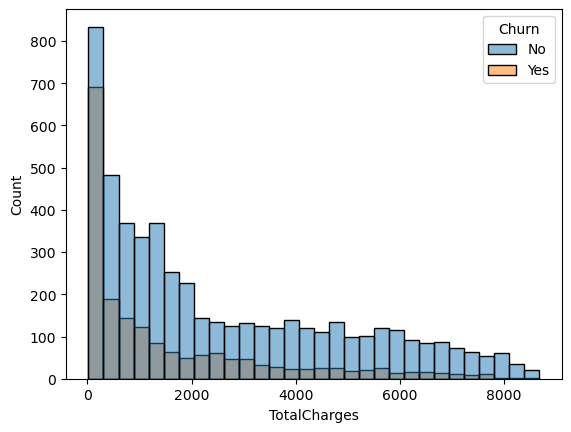

In [49]:
sns.histplot(x="TotalCharges", data = telco, bins = 30, hue = "Churn")


<Axes: xlabel='Churn', ylabel='TotalCharges'>

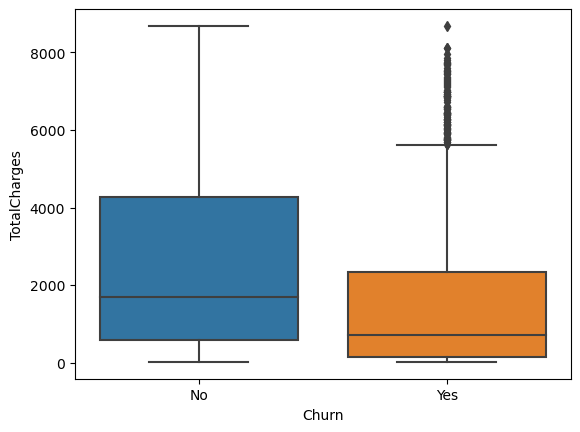

In [50]:
sns.boxplot(x="Churn", y="TotalCharges", data = telco)

In [51]:
telco.groupby("Churn")["TotalCharges"].agg({np.mean, np.median})

,median,mean
Churn,,
No,1683.60,2555.344141
Yes,703.55,1531.796094


There is something not quite right here. These results suggest people are less likely to churn with high total charges. Looking into the variable description more Total Charges are the amount payed over the entire time they were a customer. If they have a higher tenure, then they will have higher total charges.

## Tenure

<Axes: xlabel='tenure', ylabel='Count'>

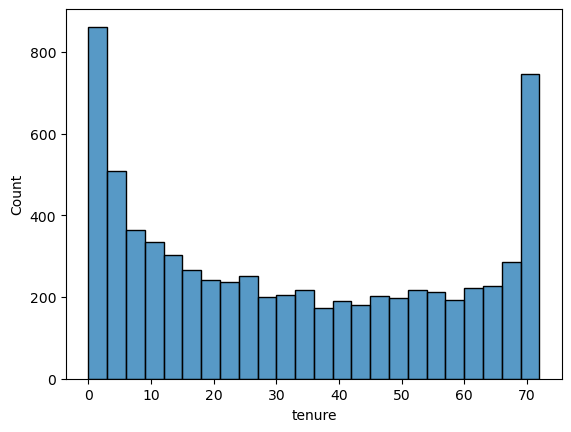

In [52]:
sns.histplot(x="tenure", data = telco, binwidth = 3)

In [53]:
telco["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

<Axes: xlabel='TotalCharges', ylabel='tenure'>

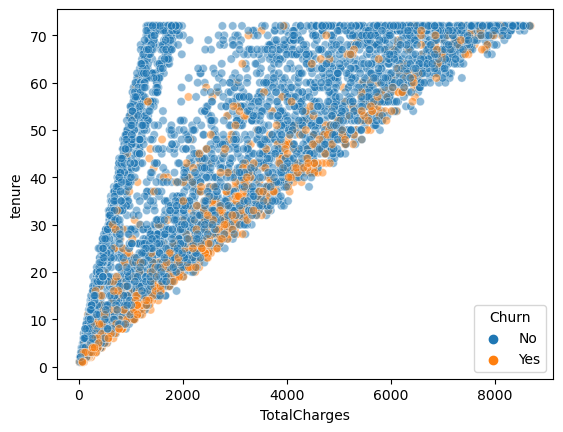

In [54]:
sns.scatterplot(y="tenure", x = "TotalCharges",  data = telco, hue = "Churn", alpha = 0.5)

In [55]:
telco["TotalCharges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

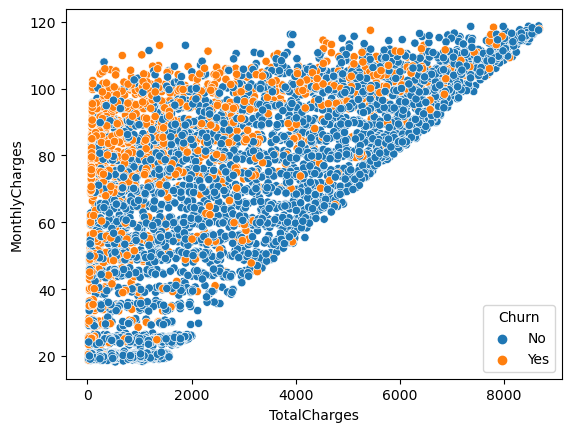

In [56]:
sns.scatterplot(y="MonthlyCharges", x = "TotalCharges", data = telco, hue = "Churn")

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

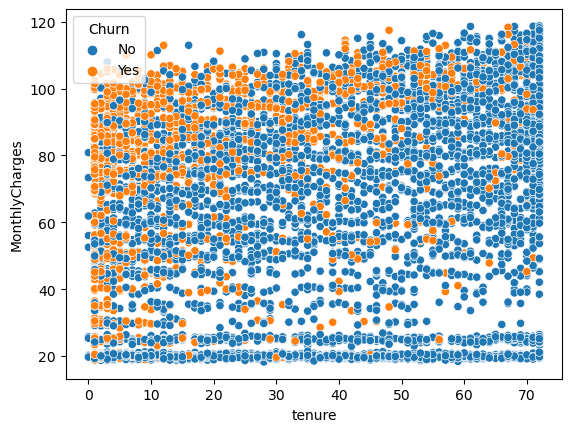

In [57]:
sns.scatterplot(y="MonthlyCharges", x = "tenure", data = telco, hue = "Churn")

<Axes: >

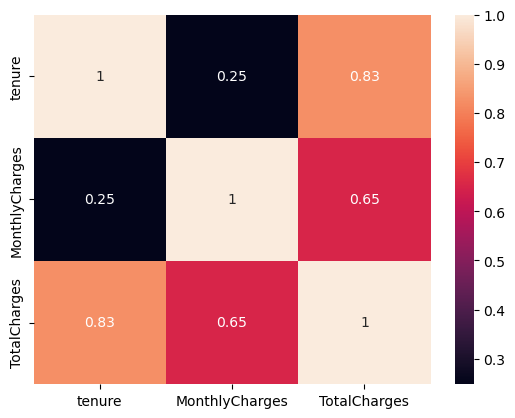

In [58]:
sns.heatmap(telco[["tenure", "MonthlyCharges","TotalCharges"]].corr(), annot =True)

Since Total Charges has a high correlation with both Monthy Charges and Tenure, It should be excluded from out model to avoid colinearity.



# Preparing for Model Building

In [112]:
# Seleceting Relavent Collumns
telco = telco[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges','Churn']]

In [113]:
#Creating Dummy Variables for Internet Variables
no_internet_vars = ['OnlineSecurity',"OnlineBackup", 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']

def rm_no_internet(var) :
    """""Removes No Internet Category and Creates Dummy Variables"""
    global telco
    telco[var] = telco[var].cat.remove_categories(removals = ["No internet service"])
    
    telco= pd.get_dummies(telco,
                              # Specify the columns from the instructions
                              columns =[var],
                              # Set the prefix
                              prefix = var
                            )

for i in no_internet_vars:
    rm_no_internet(i)

In [114]:
 for var in ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'Contract',
       'PaperlessBilling', 'PaymentMethod']:
    telco= pd.get_dummies(telco,
                              # Specify the columns from the instructions
                              columns =[var],
                              # Set the prefix
                              prefix = var
                            )

In [115]:
telco.isna().sum()

tenure                                     0
MonthlyCharges                             0
Churn                                      0
OnlineSecurity_No                          0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_Yes                       0
TechSupport_No                             0
TechSupport_Yes                            0
StreamingTV_No                             0
StreamingTV_Yes                            0
StreamingMovies_No                         0
StreamingMovies_Yes                        0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
InternetService_DSL                        0
InternetSe

In [116]:
telco.to_csv('telco_clean.csv', index=False)

In [118]:
telco.columns

Index(['tenure', 'MonthlyCharges', 'Churn', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'SeniorCitizen_0',
       'SeniorCitizen_1', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')